**Business Objective**

This notebook serves as a comprehensive analytical tool for understanding and predicting obesity levels within a given population which is a survey data of behaviour and lifestyle of clients/customers in fitness industr(FitVista). The primary objective is to leverage data-driven insights to identify key factors that contribute to different obesity categories, and classify according to the input which can then inform fitness trainers, nutritionists and healthcare assistants for future personalized recomendations.

**Data Source:** This dataset comprises 2111 records from Mexico, Peru, and Colombia, estimating obesity levels based on eating habits and physical condition. With 17 attributes, including the class variable NObesity, it classifies data into categories like Insufficient Weight, Normal Weight, and various obesity types. 77% of the data is synthetically generated using Weka and SMOTE, while 23% is collected directly from users via a web platform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Data Dictionary:**
Dataset Description: Obesity Dataset

The dataset contains information related to obesity, including demographic details, lifestyle factors, and health metrics. Each row in the dataset represents an individual.

* **Gender:** Gender of the individual (Female/Male)

* **Age:** Age of the individual (Numeric value)

* **Height:** Height of the individual in meters (Numeric value)

* **Weight:** Weight of the individual in kilograms (Numeric value)

* **FamilyHistory_Overweight:** Whether a family member has suffered or currently suffers from overweight (Yes/No)

* **FAVC:** Frequency of consuming high-caloric food (Yes/No)

* **FCVC:** Frequency of eating vegetables in meals (Never/Sometimes/Always)

* **NCP:** Number of main meals consumed daily (Between 1 and 2/Three/More than three)

* **CAEC:** Whether the individual eats any food between meals (No/Sometimes/Frequently/Always)

* **SMOKE:** Smoking habit (Yes/No)

* **CH2O:** Daily water intake (Less than a liter/Between 1 and 2 L/More than 2 L)

* **SCC:** Whether the individual monitors daily calorie intake (Yes/No)

* **FAF**: Frequency of physical activity (I do not have/1 or 2 days/2 or 4 days/4 or 5 days)

* **TUE:** Time spent on technological devices (0 to 2 hours/3 to 5 hours/More than 5 hours)

* **CALC:** Frequency of alcohol consumption (I do not drink/Sometimes/Frequently/Always)

* **MTrans:** Preferred mode of transportation (Automobile/Motorbike/Bike/Public Transportation/Walking)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [3]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df.shape

(2111, 17)

In [6]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [7]:
df = df.drop_duplicates() #removed the duplicates

In [8]:
df.shape

(2087, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [10]:
df['Age'].apply(np.ceil)

0       21.0
1       21.0
2       23.0
3       27.0
4       22.0
        ... 
2106    21.0
2107    22.0
2108    23.0
2109    25.0
2110    24.0
Name: Age, Length: 2087, dtype: float64

In [11]:
df.isna().sum() # Checking null values in columns

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.nunique() #checking unique values in each column

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# **Exploratory Data Analysis**

In [12]:
# Dividing into numerical and categorical columns
num_cols = []
cat_cols = []
for column in df.columns:
    if df[column].dtype == 'object':
       cat_cols.append(column)
    else:
       num_cols.append(column)

### Univariate analysis of numerical columns

In [13]:
df[num_cols].describe().T. #Checking summary statistics

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


**Observations:**

Most of the people are from 20-30 range of Age


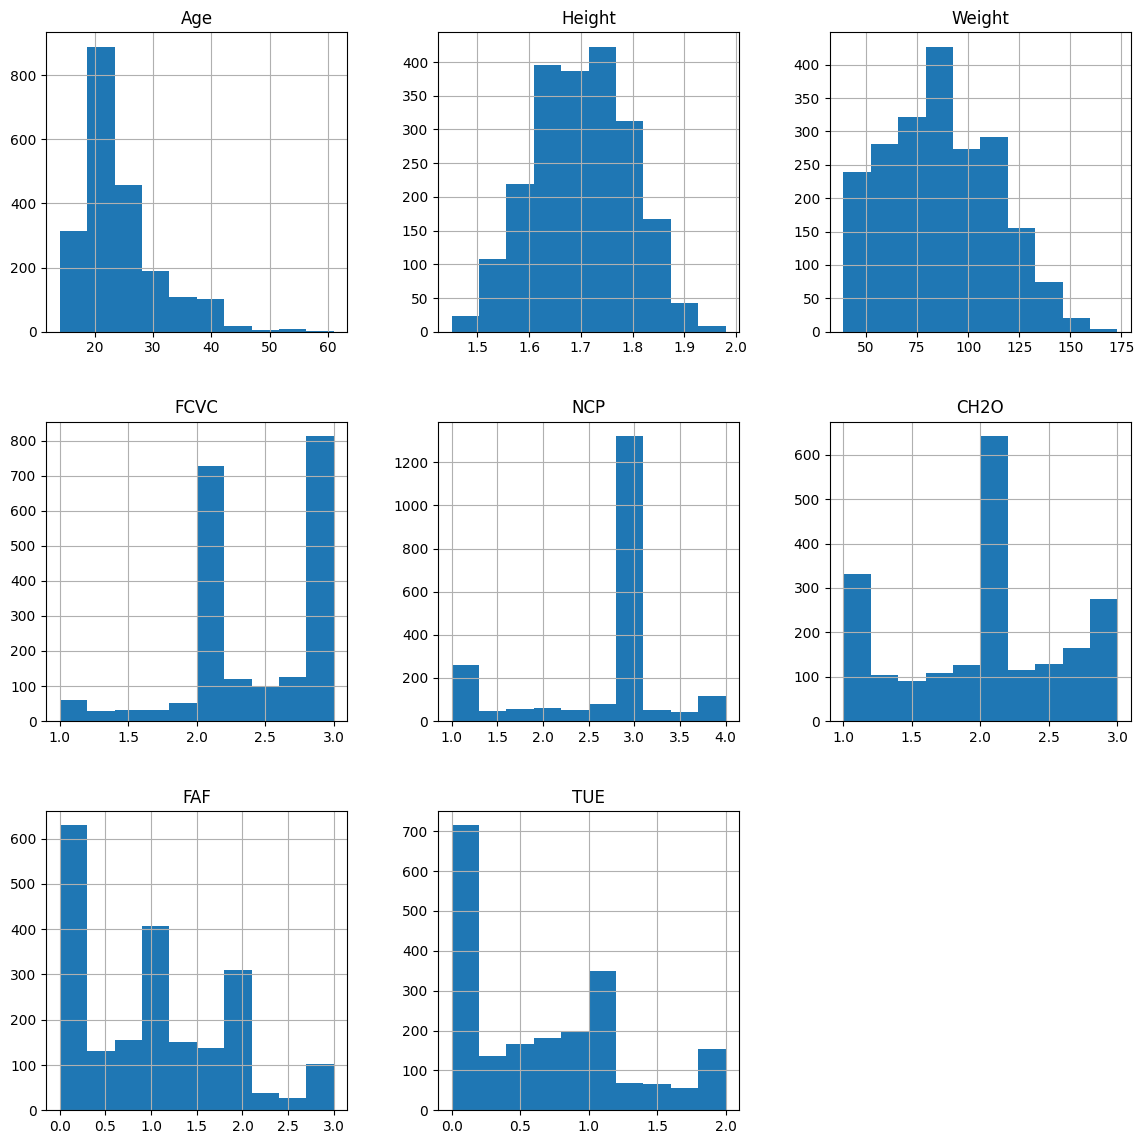

In [14]:
#creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations**

Vegetable Intake and Hydration: The data indicates positive health behaviors such as regular vegetable consumption and adequate hydration among the majority.

Meal Frequency: Most individuals adhere to the standard of three meals a day, which is a positive sign for regular dietary patterns.

Physical Inactivity: A substantial portion of the population reports no physical activity, which is a risk factor for obesity and other health issues.

Technology Use: There's a wide range of technology use, with some individuals having high screen time, which can be associated with sedentary behavior.

Age Distribution: The dataset's population is skewed towards younger adults, which may impact the generalizability of findings to older populations.

Height and Weight Norms: While height distribution is normal, the weight distribution suggests that overweight and obesity are prevalent issues among the surveyed individuals

In [15]:
unique_counts = df.groupby('family_history_with_overweight')['family_history_with_overweight'].count()
unique_counts

family_history_with_overweight
no      365
yes    1722
Name: family_history_with_overweight, dtype: int64

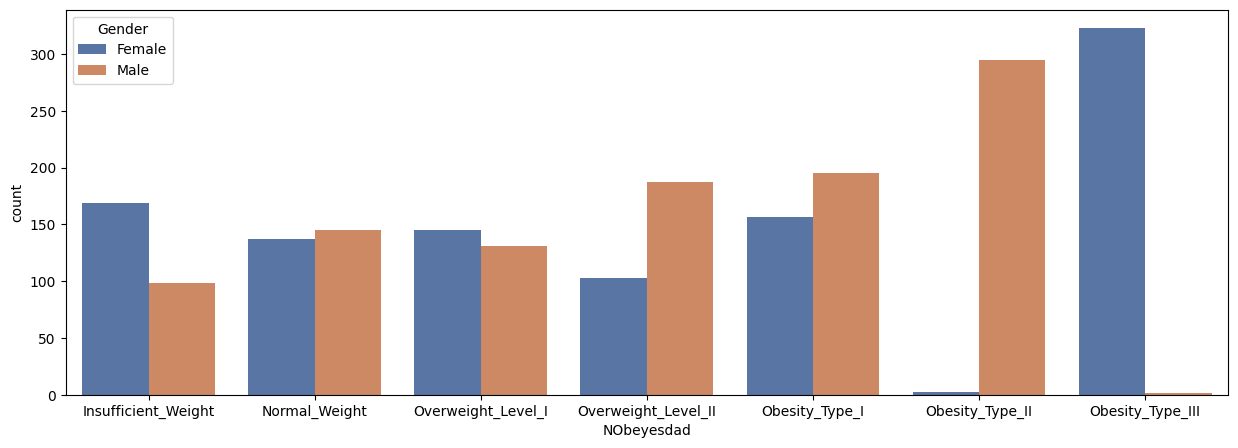

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="NObeyesdad", hue="Gender", order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"],palette='deep')
plt.show()

 **Observations:**

1.   More women tend to fall under 'Insufficient weight' category.
2.   Except for the extreme obesity category, men show a higher occurance of obesity.





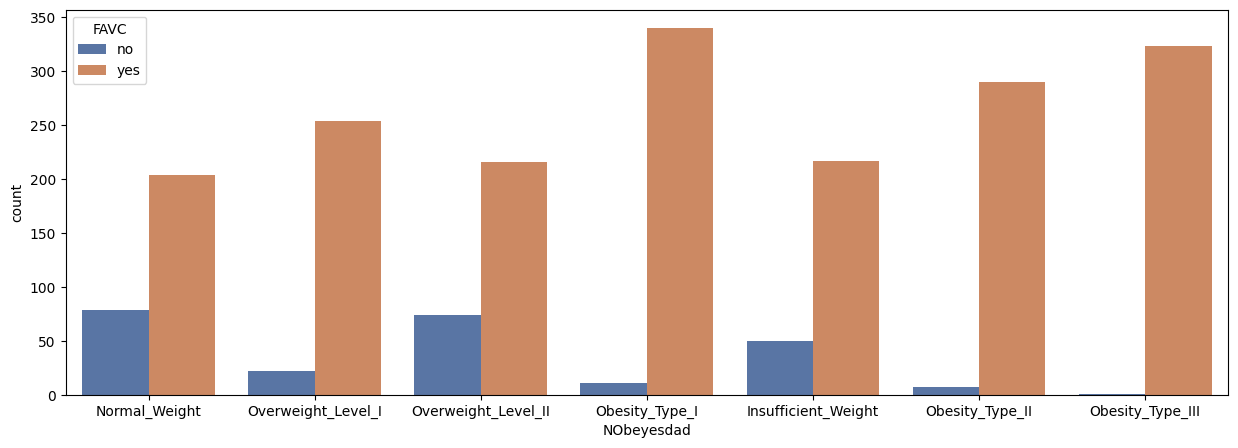

In [17]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="NObeyesdad", hue="FAVC",palette='deep')
plt.show()

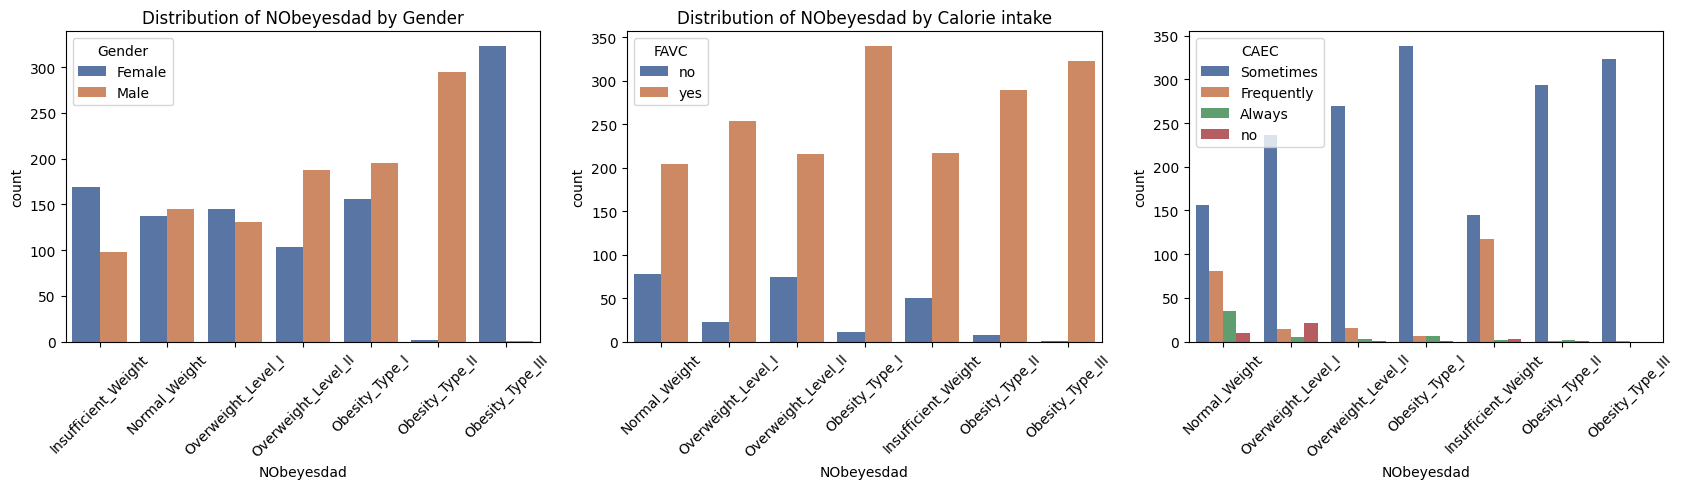

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
sns.countplot(data=df, x="NObeyesdad", hue="Gender", order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], palette='deep', ax=axes[0])
axes[0].set_title('Distribution of NObeyesdad by Gender')


sns.countplot(data=df, x="NObeyesdad", hue="FAVC", palette='deep', ax=axes[1])
axes[1].set_title('Distribution of NObeyesdad by Calorie intake')


sns.countplot(data=df, x="NObeyesdad", hue='CAEC', palette='deep', ax=axes[2])
for i in range(3):
  axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

 **Observations:**

The count of calorie intake is notably higher for the obesity category compared to overweight and normal weight categories. The number of individuals consuming fewer calories is progressively lower for each category, with the fewest observed in Obesity Type 3 compared to Obesity Types 1 and 2. However, for Overweight Level 1, the count of individuals consuming fewer calories is comparable to that of the Normal Weight category

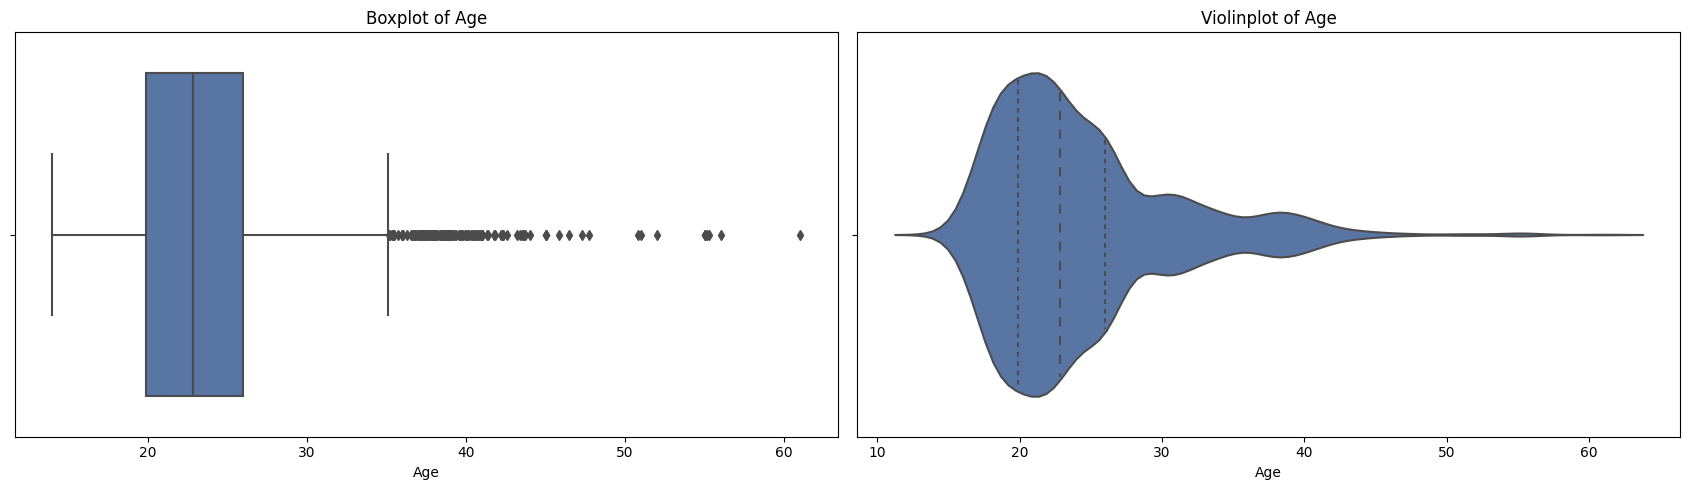

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
#sns.boxplot(x = 'Age', data = df)
sns.boxplot(x='Age', data=df, palette='deep',ax=axes[0])
sns.violinplot(x='Age', data=df, inner="quartile", palette='deep',ax=axes[1])

axes[0].set_title('Boxplot of Age')
axes[1].set_title('Violinplot of Age')
plt.tight_layout()
plt.show()

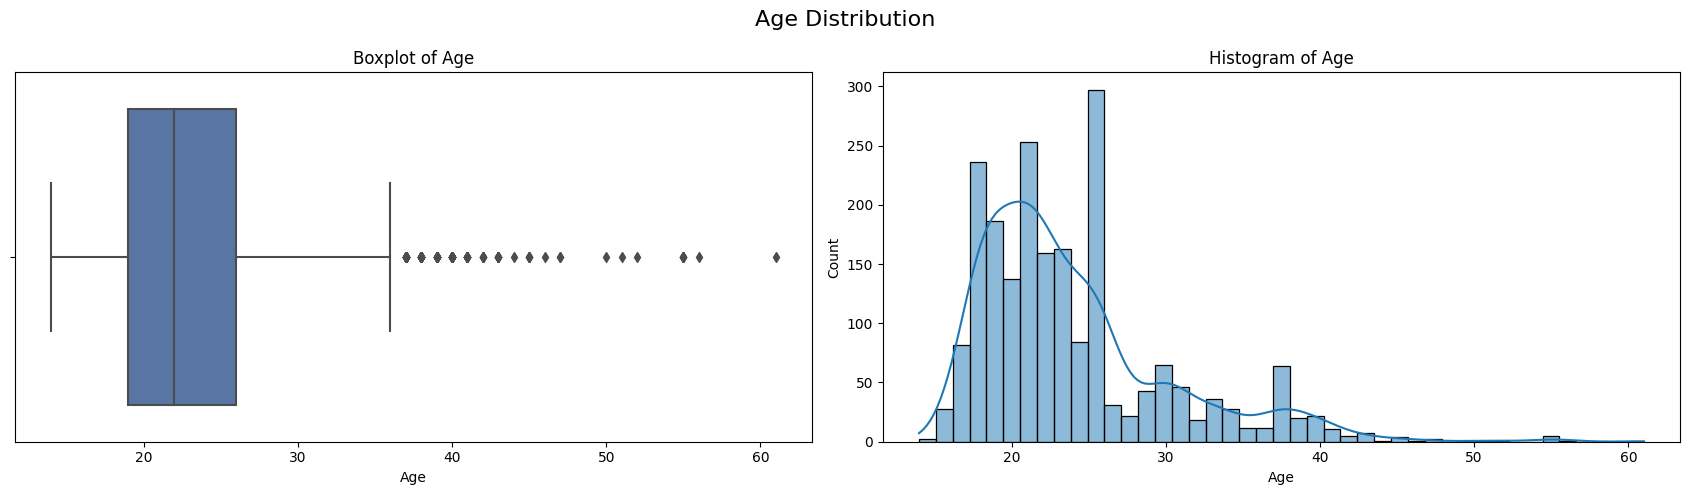

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5)) #sub-plots to visualize age column
sns.boxplot(x='Age', data=df, palette='deep',ax=axes[0]) #boxplot
sns.histplot(df['Age'], kde=True, palette='deep',ax=axes[1]) #histogram

fig.suptitle('Age Distribution', fontsize=16) #main title
axes[0].set_title('Boxplot of Age') #boxplot title
axes[1].set_title('Histogram of Age') #histogram title

plt.tight_layout()
plt.show()

The outliers are observed in individuals aged 35 years or older; however, the majority of the dataset comprises individuals aged between 18 to 40. To enhance the accuracy of predictions, individuals aged more than 60 are being filtered out, as there is limited data available for this age category

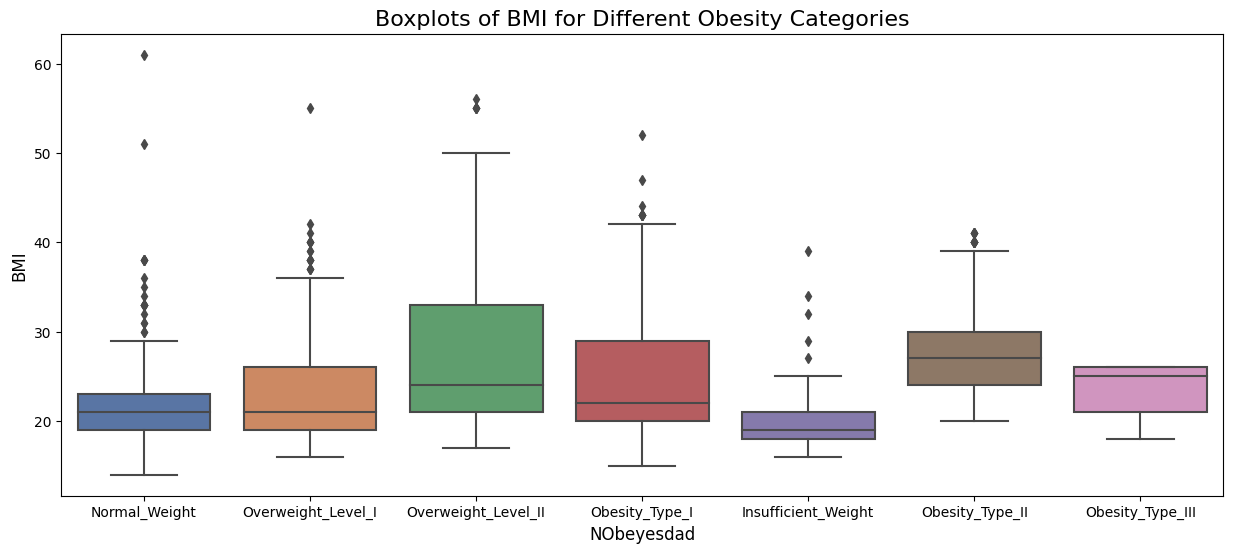

In [61]:
plt.figure(figsize=(15, 6))

sns.boxplot(x='NObeyesdad', y='Age', data=df, palette='deep')

plt.xlabel('NObeyesdad', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('Boxplots of BMI for Different Obesity Categories', fontsize=16)

plt.show()

The box plot shows how ages are distributed in different 'NObeyesdad' categories. Each box stands for a specific category and covers where most ages fall (from the 25th percentile to the 75th percentile). This helps us compare the age patterns in the different 'NObeyesdad' categories.


In [22]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Male      0.504073
Female    0.495927
Name: Gender, dtype: float64
****************************************
yes    0.825108
no     0.174892
Name: family_history_with_overweight, dtype: float64
****************************************
yes    0.883565
no     0.116435
Name: FAVC, dtype: float64
****************************************
Sometimes     0.843795
Frequently    0.113081
Always        0.025395
no            0.017729
Name: CAEC, dtype: float64
****************************************
no     0.978917
yes    0.021083
Name: SMOKE, dtype: float64
****************************************
no     0.954001
yes    0.045999
Name: SCC, dtype: float64
****************************************
Sometimes     0.661236
no            0.304744
Frequently    0.033541
Always        0.000479
Name: CALC, dtype: float64
****************************************
Public_Transportation    0.746526
Automobile               0.218495
Walking                  0.026354
Motorbike                0.005271
Bike      

In [23]:
df.groupby(['NObeyesdad'])[num_cols].mean() #Checking summary statistics of different obesity classes

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
NObeyesdad,,,,,,,,
Insufficient_Weight,19.771687,1.693572,50.013190,2.474811,2.942763,1.883852,1.273542,0.847689
Normal_Weight,21.758865,1.676950,62.164894,2.336879,2.748227,1.858156,1.251773,0.677305
Obesity_Type_I,25.884941,1.693804,92.870198,2.186050,2.431862,2.112218,0.986748,0.676743
Obesity_Type_II,28.233785,1.771795,115.305311,2.391284,2.744555,1.877658,0.971857,0.515186
Obesity_Type_III,23.495554,1.687559,120.941114,3.000000,3.000000,2.208493,0.664817,0.604623
Overweight_Level_I,23.540309,1.691277,74.483261,2.278055,2.580519,2.010979,1.059677,0.644086
Overweight_Level_II,26.996981,1.703748,82.085271,2.260578,2.495529,2.025133,0.958072,0.697275


**Observations**

* Most of the people are between the age 23-38 who have obesity and overweight issues
* People who use the highest amount of time on technolohical devices(phone,computer,etc) are usually Underweight

In [24]:
df['Age'] = df['Age'].astype(int)

<Axes: >

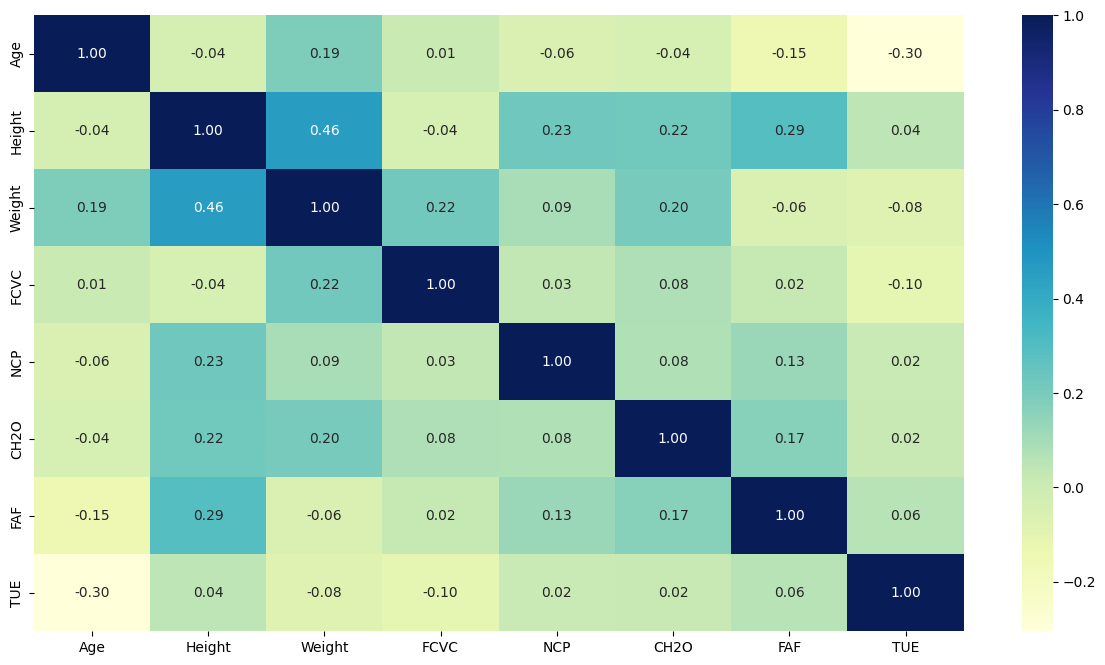

In [25]:
#plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

# Data Preparation & Feature Engineering

In [26]:
df['BMI'] = round(df['Weight'] / (df['Height'] ) ** 2, 2)
df.drop(['Weight', 'Height'], axis=1, inplace=True)

In [ ]:
df.head(10)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.39
1,Female,21,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.24
2,Male,23,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.77
3,Male,27,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.85
4,Male,22,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.34
5,Male,29,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,20.20
6,Female,23,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,24.44
7,Male,22,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,19.71
8,Male,24,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,20.20
9,Male,22,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,22.99


In [28]:
print(f"{df.groupby('NObeyesdad')['NObeyesdad'].count()} {df.groupby('MTRANS')['MTRANS'].count()}")  # Checking the transportation mode for different classes

NObeyesdad
Insufficient_Weight    267
Normal_Weight          282
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     276
Overweight_Level_II    290
Name: NObeyesdad, dtype: int64 MTRANS
Automobile                456
Bike                        7
Motorbike                  11
Public_Transportation    1558
Walking                    55
Name: MTRANS, dtype: int64


In [29]:
# Creating dummy variables for all categorical columns except 'NObeyesdad'
transformed_data = pd.get_dummies(df, columns=[col for col in cat_cols if col != 'NObeyesdad'], drop_first=True)

transformed_data.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,2.0,3.0,2.0,0.0,1.0,Normal_Weight,24.39,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21,3.0,3.0,3.0,3.0,0.0,Normal_Weight,24.24,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23,2.0,3.0,2.0,2.0,1.0,Normal_Weight,23.77,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,26.85,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,28.34,1,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
#Separating target variable and other variables
Y= transformed_data.NObeyesdad
X= transformed_data.drop(columns = ['NObeyesdad'])

In [31]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [32]:
transformed_data

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,24.39,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,24.24,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,23.77,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,26.85,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,28.34,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,44.90,0,1,...,0,0,0,0,1,0,0,0,1,0
2107,21,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,43.74,0,1,...,0,0,0,0,1,0,0,0,1,0
2108,22,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,43.54,0,1,...,0,0,0,0,1,0,0,0,1,0
2109,24,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,44.07,0,1,...,0,0,0,0,1,0,0,0,1,0


#  Data Partition

In [62]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)


In [63]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder and transform the target variable on training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable on test set
# Note: We use only 'transform', not 'fit_transform'
y_test_encoded = label_encoder.transform(y_test)


## **Model Building & Evaluation**
1.Logistic regression

In [64]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [65]:
lr=LogisticRegression()

In [66]:
lr.fit(X_train,y_train_encoded)

LogisticRegression()

In [67]:
#checking the performance on the training data
y_pred_train = lr.predict(X_train)
report=classification_report(y_train_encoded, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       221
           1       0.90      0.82      0.86       231
           2       0.94      0.91      0.92       276
           3       0.92      0.98      0.95       227
           4       0.99      0.99      0.99       264
           5       0.82      0.79      0.80       220
           6       0.82      0.84      0.83       230

    accuracy                           0.90      1669
   macro avg       0.90      0.90      0.90      1669
weighted avg       0.90      0.90      0.90      1669



In [90]:
#checking the performance on the test data
y_pred_test = lr.predict(X_test)
report=classification_report(y_test_encoded, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        46
           1       0.86      0.73      0.79        51
           2       0.93      0.85      0.89        75
           3       0.92      1.00      0.96        70
           4       1.00      1.00      1.00        60
           5       0.79      0.82      0.81        56
           6       0.77      0.80      0.79        60

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.88       418



In [93]:
print (confusion_matrix(y_test_encoded,y_pred_test))

[[45  1  0  0  0  0  0]
 [ 5 37  0  0  0  7  2]
 [ 0  0 64  6  0  0  5]
 [ 0  0  0 70  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  3  0  0  0 46  7]
 [ 0  2  5  0  0  5 48]]


2. Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [71]:
DT_clf= DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [72]:
DT_clf.fit(X_train, y_train_encoded)
pred = DT_clf.predict (X_test)
print('Accuracy: ', accuracy_score(y_test_encoded, pred))

Accuracy:  0.9736842105263158


In [94]:
print(classification_report(y_test_encoded,pred)) # to get the clasification report
print (confusion_matrix(y_test_encoded,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.98      0.96      0.97        51
           2       0.96      0.97      0.97        75
           3       0.97      0.97      0.97        70
           4       1.00      1.00      1.00        60
           5       0.98      0.96      0.97        56
           6       0.97      0.97      0.97        60

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

[[45  1  0  0  0  0  0]
 [ 2 49  0  0  0  0  0]
 [ 0  0 73  2  0  0  0]
 [ 0  0  2 68  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  0  0  0  0 54  2]
 [ 0  0  1  0  0  1 58]]


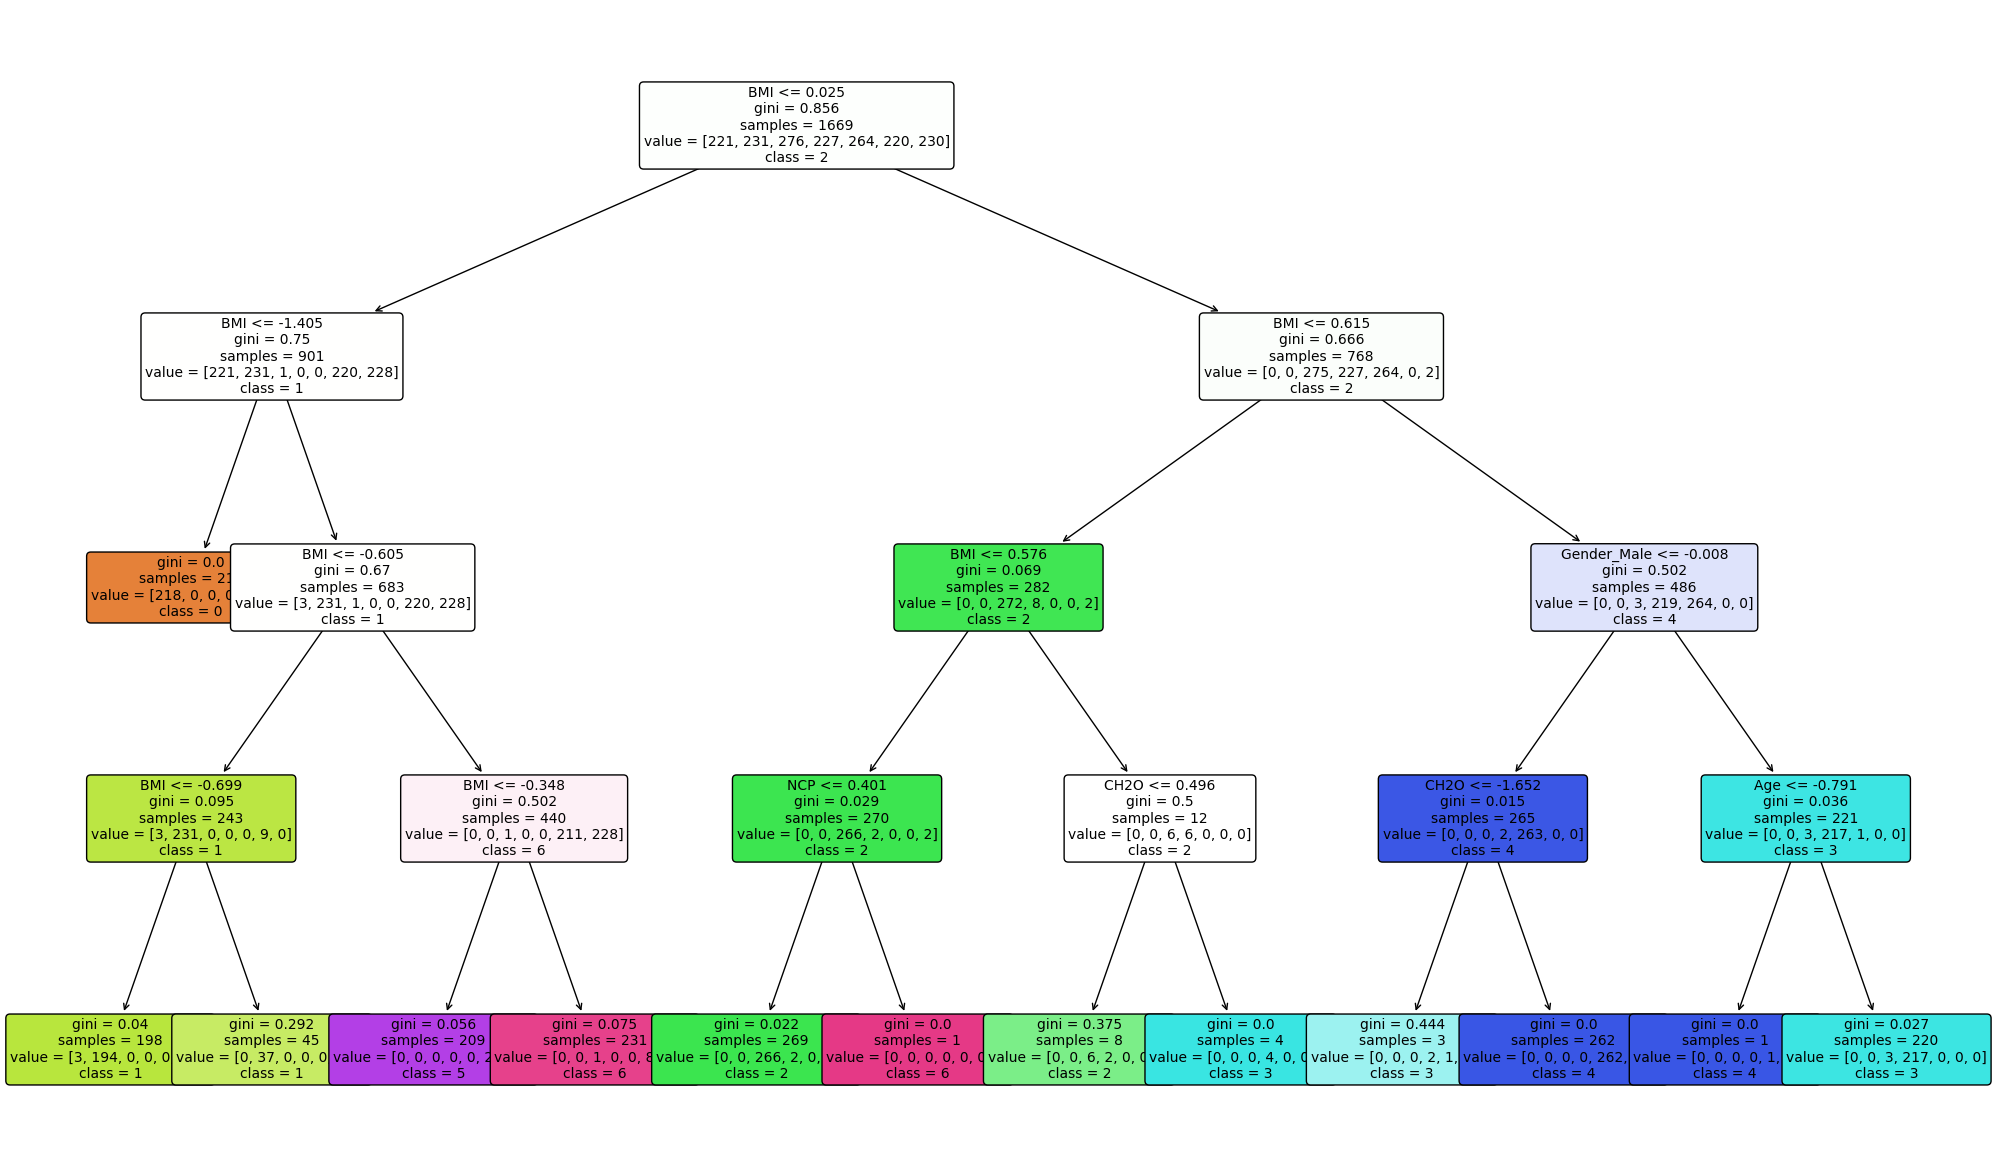

In [74]:
plt.figure(figsize=(25, 15))  #import the tree module with filled 'true' gives colorful nodes
tree.plot_tree(DT_clf, filled=True, feature_names=X_train.columns, class_names=['0','1','2','3','4','5','6'], rounded=True, fontsize=10)

plt.show()

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameters = {'ccp_alpha':np.arange(0, 0.4,0.01)}

# GridsearchCV with cross validation to perform experiments with parameters set above
DT_gscv = GridSearchCV(DT_clf, parameters, cv = 5 , scoring = 'accuracy')

In [77]:
DT_gscv.fit(X_train, y_train_encoded)  #Fit the grid search model

best_ccp_alpha = DT_gscv.best_params_['ccp_alpha'] # Get the best hyperparameters

print(best_ccp_alpha)

0.01


In [78]:
from sklearn.model_selection import cross_val_score
ccp_alphas = np.arange(0, 0.5, 0.01)
results = pd.DataFrame(columns=['model','accuracy'])   # result will be printed in Data frame
index=0
for check_alpha in ccp_alphas:        # Each alpha value from the above range will be used in iteration below
  scores=cross_val_score(DecisionTreeClassifier(ccp_alpha=check_alpha),X_train,y_train_encoded,scoring='accuracy',cv=5) #5 -fold cross val scores will be calculated
  results.loc[index] = [DecisionTreeClassifier(ccp_alpha=check_alpha), np.mean(scores)]
  index=index+1
results

,model,accuracy
0,DecisionTreeClassifier(),0.962849
1,DecisionTreeClassifier(ccp_alpha=0.01),0.963451
2,DecisionTreeClassifier(ccp_alpha=0.02),0.963451
3,DecisionTreeClassifier(ccp_alpha=0.03),0.963451
4,DecisionTreeClassifier(ccp_alpha=0.04),0.963451
5,DecisionTreeClassifier(ccp_alpha=0.05),0.963451
6,DecisionTreeClassifier(ccp_alpha=0.06),0.963451
7,DecisionTreeClassifier(ccp_alpha=0.07),0.963451
8,DecisionTreeClassifier(ccp_alpha=0.08),0.963451
9,DecisionTreeClassifier(ccp_alpha=0.09),0.963451


In [79]:
import plotly.express as px     #used plotly for interactive visualisation to show the best ccp_alpha value
acuracy = results['accuracy']
fig = px.line(x=ccp_alphas, y=acuracy) # the plot with 'x'axis as ccp_alphas and y axis as accuracy
fig.show()

In [80]:
Prune_Tree= DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)   #prune_tree uses the best ccp_alpha value to reduce the overfitting
Prune_Tree.fit(X_train,y_train_encoded)

DecisionTreeClassifier(ccp_alpha=0.01)

In [81]:
pred_2 = Prune_Tree.predict(X_test)
print('Accuracy: ', accuracy_score(y_test_encoded, pred_2))

Accuracy:  0.9665071770334929


In [82]:
print(classification_report(y_test_encoded,pred_2)) # to get the clasification report
print (confusion_matrix(y_test_encoded,pred_2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.98      0.96      0.97        51
           2       0.92      0.97      0.95        75
           3       0.99      0.94      0.96        70
           4       0.98      1.00      0.99        60
           5       0.98      0.96      0.97        56
           6       0.97      0.95      0.96        60

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

[[45  1  0  0  0  0  0]
 [ 2 49  0  0  0  0  0]
 [ 0  0 73  1  1  0  0]
 [ 0  0  4 66  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  0  0  0  0 54  2]
 [ 0  0  2  0  0  1 57]]


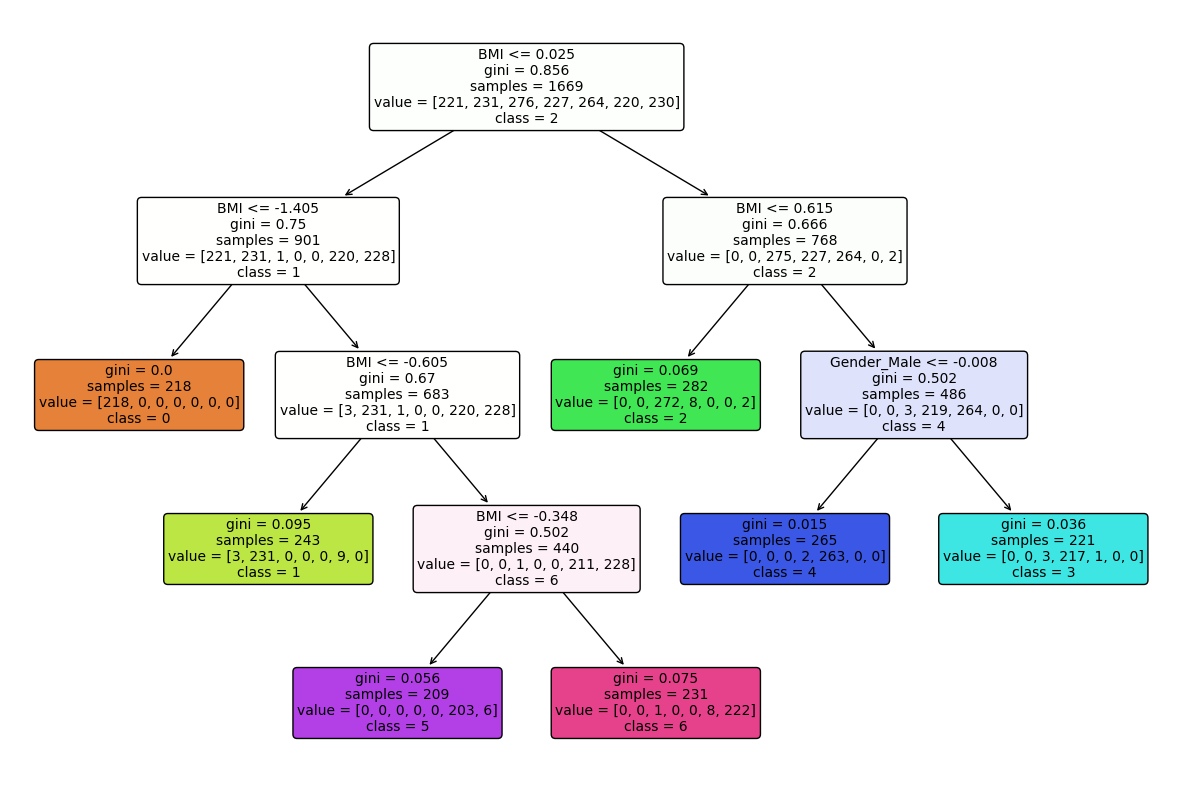

In [83]:
plt.figure(figsize=(15, 10))   #this tree will have less branches
tree.plot_tree(Prune_Tree, filled=True, feature_names=X_train.columns, class_names=['0','1','2','3','4','5','6'], rounded=True, fontsize=10) #prune_tree will be displayed with colorful nodes
plt.show()

3. Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
random_forest_Model = RandomForestClassifier()

In [85]:
random_forest_Model.fit(X_train,y_train_encoded)

RandomForestClassifier()

In [86]:
rf_pred_train =random_forest_Model.predict(X_train) #train accuracy
print('Accuracy: ', accuracy_score(y_train_encoded, rf_pred_train))

Accuracy:  1.0


In [87]:
rf_pred_test =random_forest_Model.predict(X_test)                        #checking test accuracy
print('Accuracy: ', accuracy_score(y_test_encoded, rf_pred_test))

Accuracy:  0.9832535885167464


In [95]:
print(classification_report(y_test_encoded,rf_pred_test)) # to get the clasification report
random_forest_conf_matrix = print (confusion_matrix(y_test_encoded,rf_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.89      1.00      0.94        51
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        60
           5       0.98      0.95      0.96        56
           6       1.00      0.95      0.97        60

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418

[[45  1  0  0  0  0  0]
 [ 0 51  0  0  0  0  0]
 [ 0  0 75  0  0  0  0]
 [ 0  0  0 70  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  3  0  0  0 53  0]
 [ 0  2  0  0  0  1 57]]


# **Model Comparison & Selection**

<Figure size 1200x1500 with 0 Axes>

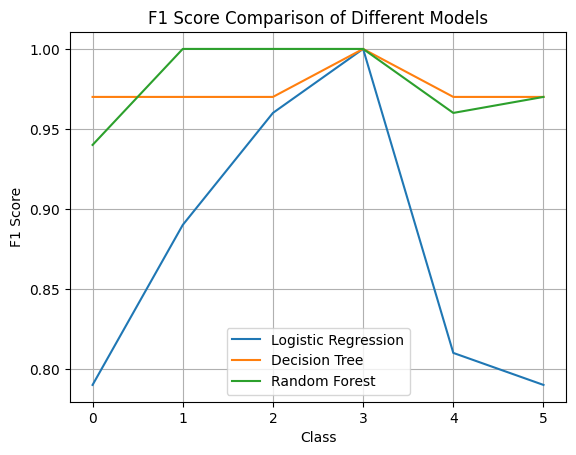

<Figure size 1200x1500 with 0 Axes>

In [108]:
DT_f1_scores= [0.97, 0.97, 0.97, 1.00, 0.97, 0.97]
lr_f1_scores = [0.79, 0.89, 0.96, 1.00, 0.81, 0.79]
rf_f1_scores = [0.94, 1.00, 1.00, 1.00, 0.96, 0.97]

# Plotting the F1 scores
plt.plot(lr_f1_scores, label='Logistic Regression')
plt.plot(DT_f1_scores, label='Decision Tree')
plt.plot(rf_f1_scores,label='Random Forest')

# Adding labels and title
plt.xlabel('class')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.legend()

# Display the plot
plt.grid(True)
plt.figure(figsize=(12, 15))


**F1 Score is considered as it is perfect balance for precision and recall**

Class-Specific Performance: Models vary in performance across classes, indicating specific strengths for each.

Random Forest Stability: Random Forest is consistently strong across all classes, suggesting robust classification.

Logistic Regression Improvement: Logistic Regression exhibits improved or consistent performance, showcasing strengths in certain classes.

Decision Tree Variability: Decision Tree shows variability, indicating potential overfitting to specific classes.

**Model Selection:** For overall performance, Random Forest is preferable as it predicted well for allmost all classes.